In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. 
Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Этапы работы:
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
- Проведите первичный анализ.
- Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.
- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

In [50]:
df = pd.read_csv('adult.csv')

# Исследование

In [44]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [51]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(10*'-')


age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
----------
workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------
fnlwgt
[226802  89814 336951 ... 129912 255835 257302]
----------
education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
----------
educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
----------
marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
----------
occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exe

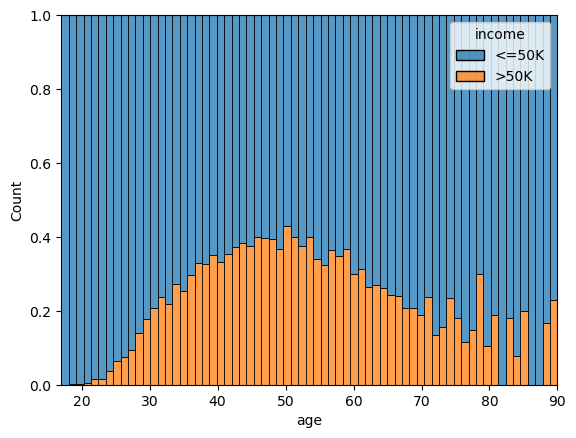

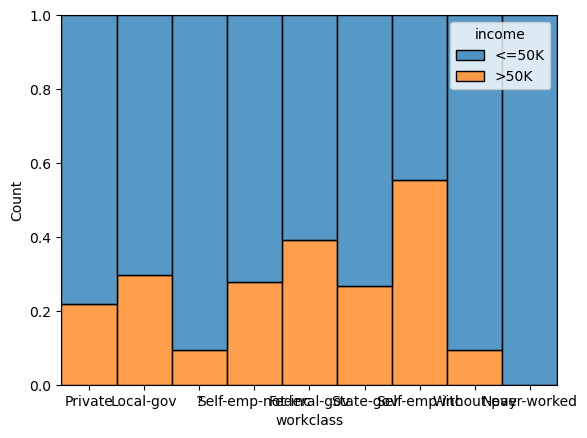

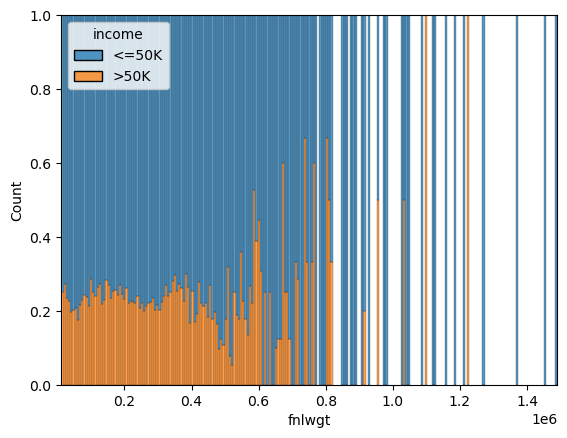

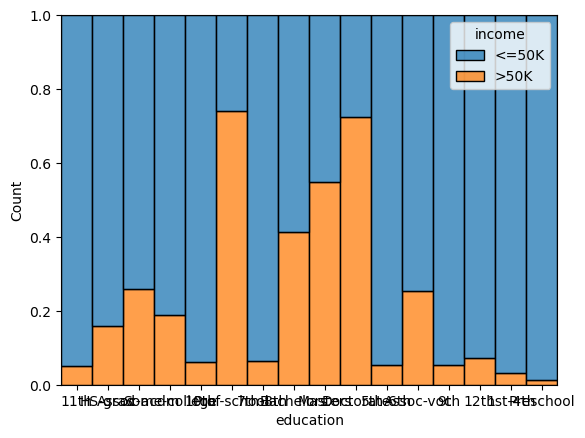

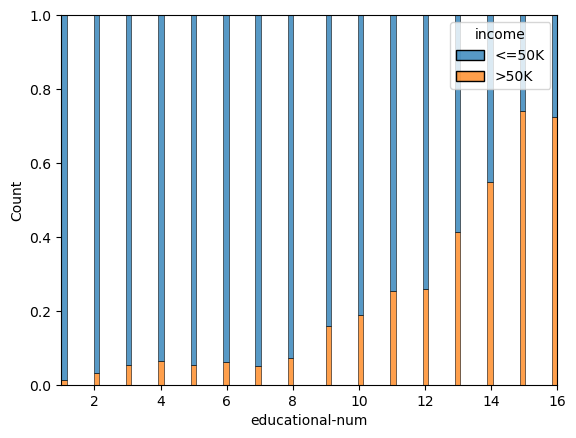

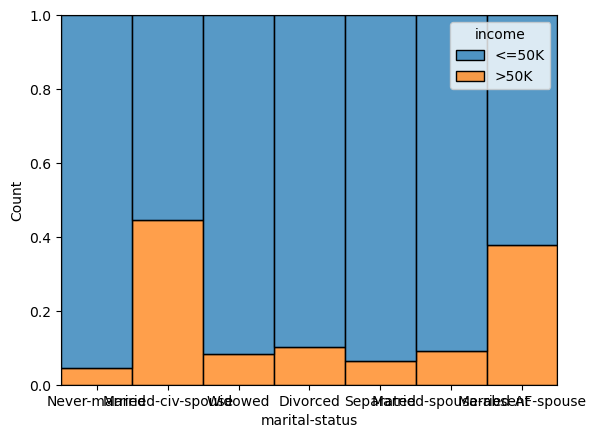

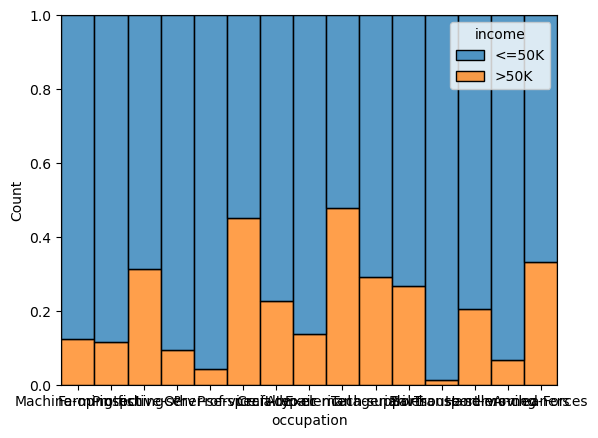

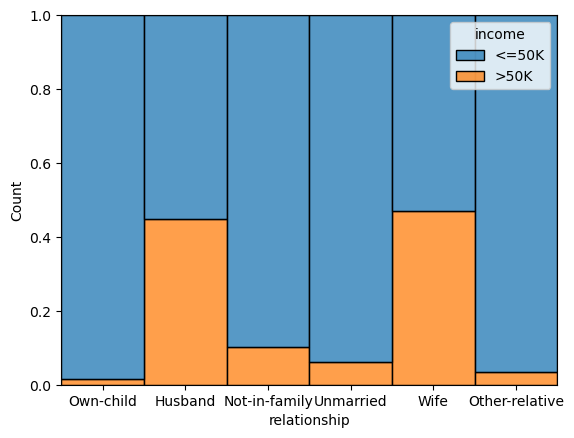

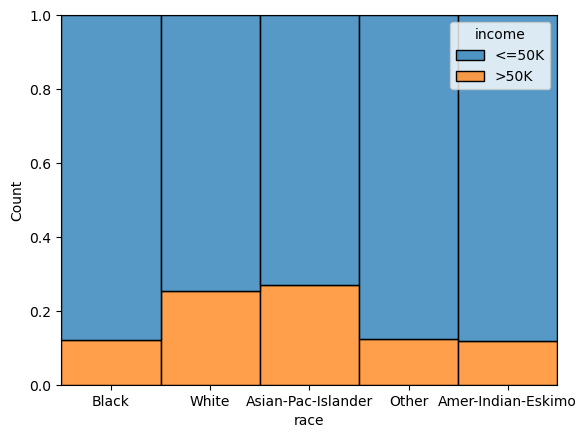

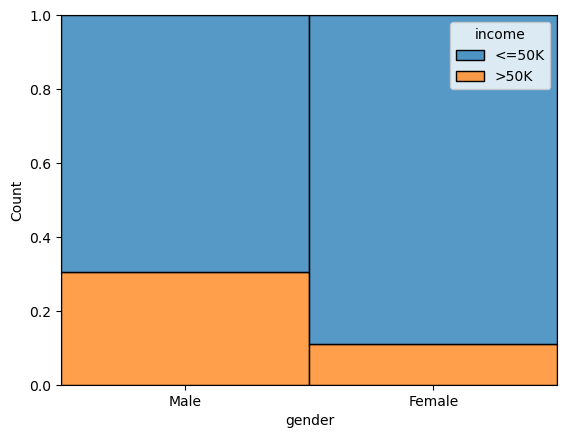

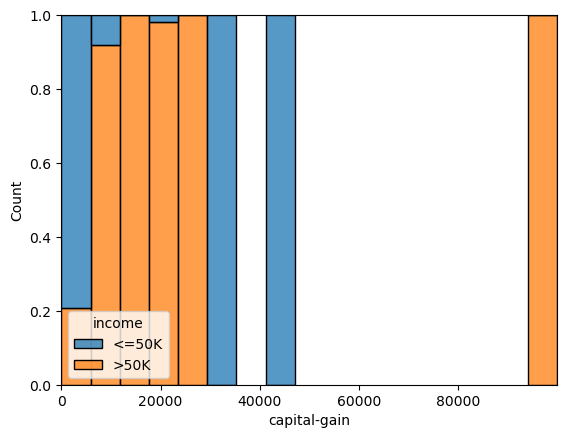

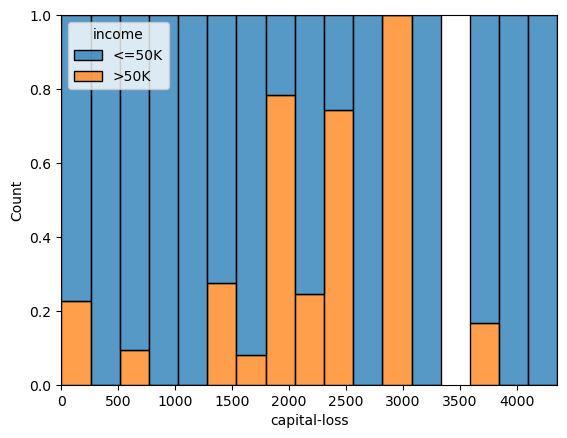

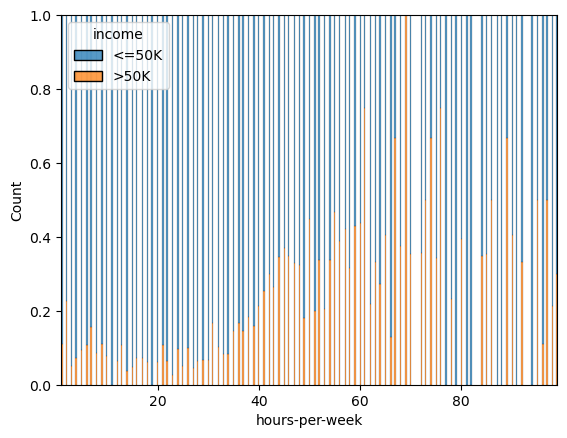

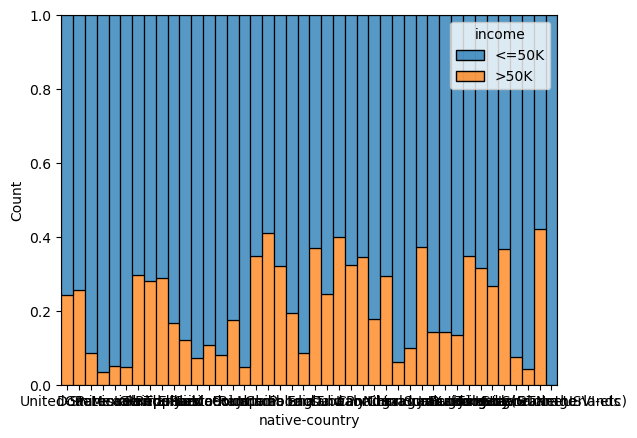

In [52]:
for col in df.columns.drop('income'):
    sns.histplot(
        data=df,
        x=col,
        hue='income',
        multiple='fill',
    )
    plt.show()

# Пропуски
Замечаны `?` в признаках 'workclass', 'occupation', 'native-country'

Их, вероятно, можно рассматривать как пропуски. 

Заменим такие данные на моду

In [55]:
for col in ['workclass', 'occupation', 'native-country']:
    df.loc[df[col]=='?', col] = df[col].mode()[0]

# Преобразование признаков.

Вероятно для `education` можно было бы использовать LabelEncoder, но я не знаю особенностей выстраивания образования в США. Поэтому будем использовать One Hot Encoder

In [92]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder().fit(df['income'])
y = le.transform(df['income'])
df_x = df.drop(['income'], axis=1)
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [93]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [94]:
X = df_x.select_dtypes(include='int').merge(
    pd.get_dummies(
        df_x.select_dtypes(exclude='int'),
        dtype=int),
    left_index=True, 
    right_index=True
    )

In [95]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Создание модели

## Логистическая регрессия

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
np.random.seed(50) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
log_r = LogisticRegression()
log_r.fit(X_train, y_train)


LogisticRegression()

In [100]:
log_r.score(X_train, y_train)

0.7999129833900648

In [102]:
log_r.predict(X_test)[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
log_r.score(X_test, y_test)

0.7911761695158154

## SVM

In [103]:
from sklearn.svm import SVC


In [104]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [108]:
svc.score(X_train, y_train)

0.7993243416169734

In [109]:
svc.predict(X_test)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
svc.score(X_test, y_test)

0.794451837444979

# Выводы

Обе модели показали достаточно высокий уровень - 80%

SVC была чуть лучше на тестовых данных. Но за это улучшение пришлось заплатить очень долгим временем работы. Видимо сказывается большое количество катеориальных признаков.



## Что можно сделать для улучшения

1. Убрать признаки capital-loss и capital-gain. В большинстве объектов там стоят нули. Возможно они только вносят лишний шум.

2. Возможно следовало убрать признак fnlwgt. Как я понял это количество людей соответсвующих критерию. Если модель будет использоваться для оценки конкретного персонажа, то он бесмысленен.

3. Провести нормализацию числовых данных